# COVID-19 Open Research Dataset Analysis

## Dataset Information

The CORD-19 dataset is an open-access collection of scientific publications related to the **COVID-19 pandemic**, published by the **Allen Institute for AI**. It contains **over one million records**.

The `metadata.csv` file provides essential **article metadata**, including **title**, **abstract**, **authors**, and **publication date**. In this study, the dataset was loaded, its structure inspected, and prepared for exploratory data analysis.

### Key Metadata Fields

- **cord_uid**: Unique article identifier
- **title**: Article title
- **abstract**: Abstract text
- **authors**: List of authors
- **journal**: Publishing journal
- **publish_time**: Publication date
- **doi / pmcid / pubmed_id / arxiv_id**: External identifiers
- **license**: Publication license
- **source_x**: Data sources (e.g., ArXiv, PMC, WHO)
- **url**: Article URLs
- **pdf_json_files / pmc_json_files**: Parsed full-text file paths
- **s2_id**: Semantic Scholar ID

## EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("metadata.csv")

In [3]:
df.head(5) 

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id
0,ug7v899j,d1aafb70c066a2068b02786f8929fd9c900897fb,PMC,Clinical features of culture-proven Mycoplasma...,10.1186/1471-2334-1-6,PMC35282,11472636,no-cc,OBJECTIVE: This retrospective chart review des...,2001-07-04,"Madani, Tariq A; Al-Ghamdi, Aisha A",BMC Infect Dis,NaN,NaN,NaN,document_parses/pdf_json/d1aafb70c066a2068b027...,document_parses/pmc_json/PMC35282.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,NaN
1,02tnwd4m,6b0567729c2143a66d737eb0a2f63f2dce2e5a7d,PMC,Nitric oxide: a pro-inflammatory mediator in l...,10.1186/rr14,PMC59543,11667967,no-cc,Inflammatory diseases of the respiratory tract...,2000-08-15,"Vliet, Albert van der; Eiserich, Jason P; Cros...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/6b0567729c2143a66d737...,document_parses/pmc_json/PMC59543.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
2,ejv2xln0,06ced00a5fc04215949aa72528f2eeaae1d58927,PMC,Surfactant protein-D and pulmonary host defense,10.1186/rr19,PMC59549,11667972,no-cc,Surfactant protein-D (SP-D) participates in th...,2000-08-25,"Crouch, Erika C",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/06ced00a5fc04215949aa...,document_parses/pmc_json/PMC59549.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
3,2b73a28n,348055649b6b8cf2b9a376498df9bf41f7123605,PMC,Role of endothelin-1 in lung disease,10.1186/rr44,PMC59574,11686871,no-cc,Endothelin-1 (ET-1) is a 21 amino acid peptide...,2001-02-22,"Fagan, Karen A; McMurtry, Ivan F; Rodman, David M",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/348055649b6b8cf2b9a37...,document_parses/pmc_json/PMC59574.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
4,9785vg6d,5f48792a5fa08bed9f56016f4981ae2ca6031b32,PMC,Gene expression in epithelial cells in respons...,10.1186/rr61,PMC59580,11686888,no-cc,Respiratory syncytial virus (RSV) and pneumoni...,2001-05-11,"Domachowske, Joseph B; Bonville, Cynthia A; Ro...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/5f48792a5fa08bed9f560...,document_parses/pmc_json/PMC59580.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056660 entries, 0 to 1056659
Data columns (total 19 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   cord_uid          1056660 non-null  object 
 1   sha               373766 non-null   object 
 2   source_x          1056660 non-null  object 
 3   title             1056157 non-null  object 
 4   doi               656780 non-null   object 
 5   pmcid             389571 non-null   object 
 6   pubmed_id         498932 non-null   object 
 7   license           1056660 non-null  object 
 8   abstract          821116 non-null   object 
 9   publish_time      1054846 non-null  object 
 10  authors           1032791 non-null  object 
 11  journal           969338 non-null   object 
 12  mag_id            0 non-null        float64
 13  who_covidence_id  482935 non-null   object 
 14  arxiv_id          14249 non-null    object 
 15  pdf_json_files    373766 non-null   object 
 16  

In [5]:
df.shape

(1056660, 19)

In [94]:
df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce')
df['year'] = df['publish_time'].dt.year.astype('Int64')
df['month'] = df['publish_time'].dt.month.astype('Int64')
print(f"The most frequent year: {df['year'].mode().iloc[0]}")
print(f"The most frequent month: {df['month'].mode().iloc[0]}")

The most frequent year: 2021
The most frequent month: 5


In [95]:
df['author_count'] = df['authors'].astype('str').apply(lambda x: len(x.split(';')) if x != 'nan' else 0)
print(f"The average number of authors: {df['author_count'].mean().round()}")

The average number of authors: 6.0


In [108]:
df['abstract_length'] = df['abstract'].astype(str).apply(len)
print(f"The average length of abstract: {df['abstract_length'].mean().round()} characters")

The average length of abstract: 1136.0 characters


In [107]:
## Missing Value Analysis
missing_values = df.isnull().sum().sort_values(ascending=False).head(10)
missing_percent = (missing_values / len(df)) * 100

missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Missing (%)': missing_percent
})
missing_data

,Missing Values,Missing (%)
mag_id,1056660,100.000000
arxiv_id,1042411,98.651506
pmc_json_files,740918,70.118865
pdf_json_files,682894,64.627600
sha,682894,64.627600
pmcid,667089,63.131849
who_covidence_id,573725,54.296084
pubmed_id,557728,52.782163
publish_time,537789,50.895179
month,537789,50.895179


In [ ]:
## Feature Engineering
# For an article must have it's unique cord_uid, title and authors
must_have_cols = [
    'cord_uid',
    'title',
    'authors',
    'abstract'
]
df_clean = df.dropna(subset=must_have_cols)
# Abstract usually is longer than 50 characters
df_clean = df_clean[df_clean['abstract'].str.len() > 50]
# Number of authors is usually between 1-100
df_clean = df_clean[df_clean['author_count'].between(1, 100)]
print(f"Original rows: {len(df)}")
print(f"Remaining rows: {len(df_clean)}")

In [ ]:
plt.figure(figsize=(10, 6))
df_clean['source_x'].value_counts().head(10).plot(kind = 'bar')
plt.title("Distribution of Publication Sources")
plt.xlabel("Source")
plt.ylabel("Number of Publications")
plt.xticks(rotation=45, ha='right')
plt.show()

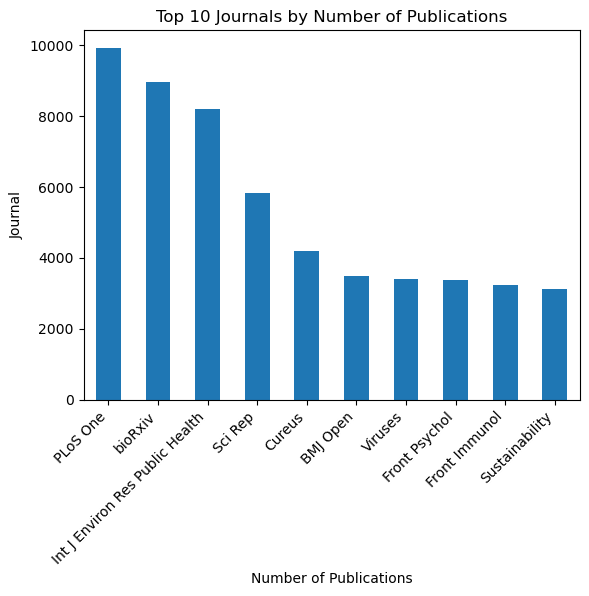

In [99]:
top_journals = df_clean['journal'].value_counts().head(10)
top_journals.plot(kind = 'bar')
plt.title("Top 10 Journals by Number of Publications")
plt.xlabel("Number of Publications")
plt.ylabel("Journal")
plt.xticks(rotation=45, ha='right')
plt.show()

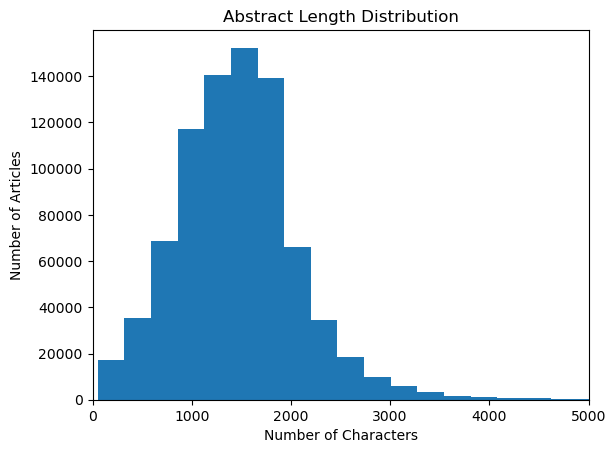

In [104]:
plt.hist(df_clean['abstract_length'], bins=100)
plt.title("Abstract Length Distribution")
plt.xlabel("Number of Characters")
plt.ylabel("Number of Articles")
plt.xlim(0, 5000)
plt.show()

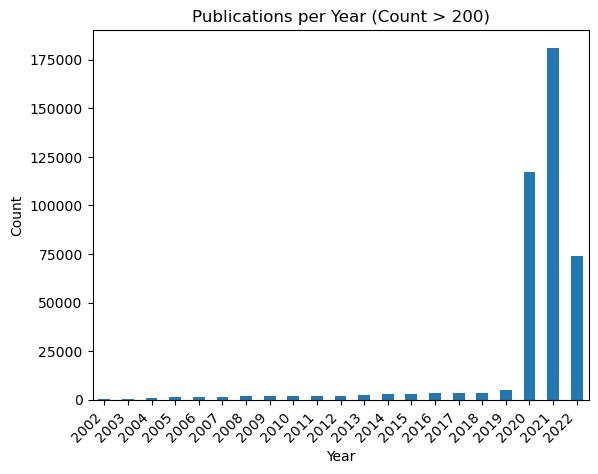

In [105]:
year_counts = df_clean['year'].value_counts()
year_counts = year_counts[year_counts > 200].sort_index()

year_counts.plot(kind='bar')
plt.xticks(rotation=45, ha='right')
plt.title('Publications per Year (Count > 200)')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

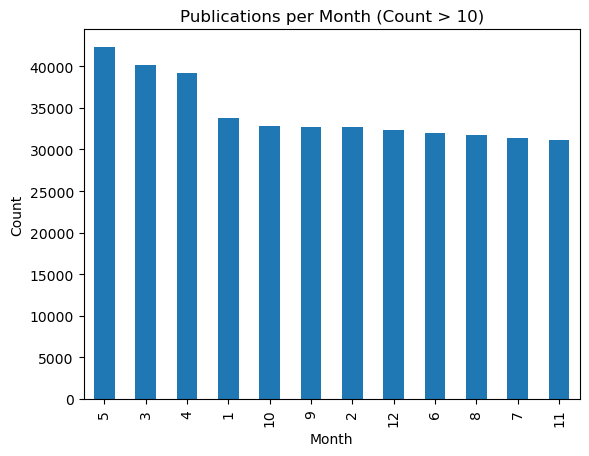

In [106]:
month_counts = df_clean['month'].value_counts()
month_counts.plot(kind='bar')
plt.title('Publications per Month (Count > 10)')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

## Clustering

In [112]:
!pip install langdetect

     ---------------------------------------- 0.0/981.5 kB ? eta -:--:--
     ------------------------------------- 981.5/981.5 kB 21.8 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993250 sha256=9d82ed78d63b71b396fd55e18405f291e47a018a20b4eb95907fabcbcb22c981
  Stored in directory: c:\users\zhang\appdata\local\pip\cache\wheels\eb\87\25\2dddf1c94e1786054e25022ec5530bfed52bad86d882999c48
Successfully built langdetect


  DEPRECATION: Building 'langdetect' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'langdetect'. Discussion can be found at https://github.com/pypa/pip/issues/6334
